# **MÓDULO 13**
# Projeto - Fundamentos da Descoberta de Dados

Nesse projeto trabalharemos com a base de dados de produtos de um supermercado do Chile.
A ideia é que vocês apliquem os conceitos estatísticos vistos no último módulo, mais os conceitos de visualizações de dados através de gráficos e finalizem publicando no seu github!

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import numpy as np
import seaborn as sns

Faça a leitura dos dados do arquivo CSV:


Altere o código abaixo de acordo com seu diretório.

In [3]:
df = pd.read_csv("MODULO7_PROJETOFINAL_BASE_SUPERMERCADO.csv")
df.head()

,title,Marca,preco_normal,Preco_Desconto,Preco_Anterior,Desconto,categoria
0,"Pack 12 un, Leche extra proteína 1 L",Loncoleche,19788,0,0,0,lacteos
1,"Pack 12 un, Leche chocolate receta original 1 L",Soprole,18228,0,0,0,lacteos
2,"Pack 12 un, Leche semidescremada chocolate 1 L",Soprole,18228,0,0,0,lacteos
3,"Pack 12 un, Leche semidescremada frutilla 1 L",Soprole,18228,0,0,0,lacteos
4,"Pack 12 un, Leche sin lactosa chocolate 1 L",Loncoleche,17988,0,0,0,lacteos


Os campos do nosso dataframe são:

**Title:** Nome do produto.


**Marca:** A marca do produto.


**Preco_Normal:** O preço em que o produto costuma ser vendido quando não há desconto.


**Preco_Desconto:** O preço vendido após o desconto ser aplicado.


**Preco_Anterior:** Preço em que era comercializado o produto antes do desconto aplicado.


**Desconto:** Total de desconto aplicado.






As colunas que aparecem com valores 0 são para os produtos onde não tivemos descontos aplicados.


As categorias estão em espanhol!

# 1 - Traga a média e a mediana dos preços - coluna Preco_Normal - por categoria de produto.
# Identifique as categorias que parecem ter um valor de média abaixo ou acima da mediana.

In [3]:
# Seu código aqui para a média
media_cat = df.groupby('categoria')['preco_normal'].mean().sort_values(ascending=False)
print("Média por categoria:")
print(media_cat)

Média por categoria:
categoria
comidas-preparadas            3095.043478
lacteos                       2385.219239
congelados                    2108.042553
belleza-y-cuidado-personal    1783.556485
frutas                        1724.473684
verduras                      1343.296875
instantaneos-y-sopas           765.491228
Name: preco_normal, dtype: float64


In [6]:
#Seu código aqui para a mediana
mediana_cat = df.groupby('categoria')['preco_normal'].median().sort_values(ascending=False)
print("\nMediana por categoria:")
print(mediana_cat)


Mediana por categoria:
categoria
comidas-preparadas            3290.0
belleza-y-cuidado-personal    1569.0
congelados                    1519.0
frutas                        1195.0
verduras                      1180.0
lacteos                        989.0
instantaneos-y-sopas           439.0
Name: preco_normal, dtype: float64


In [12]:
#Para definir se a uma diferança de dados usei a formula: diferença % = (media-mediana/mediana)x100
resumo = df.groupby('categoria')['preco_normal'].agg(['mean', 'median']).reset_index()
resumo['Diferenca_%'] = ((resumo['mean'] - resumo['median']) / resumo['median']) * 100
print(resumo)


                    categoria         mean  median  Diferenca_%
0  belleza-y-cuidado-personal  1783.556485  1569.0    13.674728
1          comidas-preparadas  3095.043478  3290.0    -5.925730
2                  congelados  2108.042553  1519.0    38.778312
3                      frutas  1724.473684  1195.0    44.307421
4        instantaneos-y-sopas   765.491228   439.0    74.371578
5                     lacteos  2385.219239   989.0   141.174847
6                    verduras  1343.296875  1180.0    13.838718


In [13]:
#Foi definido uma margem imaginaria  de 20% para a diferença de resultado

margem_imaginaria = 20
fora_da_margem =  resumo[abs(resumo['Diferenca_%']) > margem_imaginaria]

print(fora_da_margem)

              categoria         mean  median  Diferenca_%
2            congelados  2108.042553  1519.0    38.778312
3                frutas  1724.473684  1195.0    44.307421
4  instantaneos-y-sopas   765.491228   439.0    74.371578
5               lacteos  2385.219239   989.0   141.174847


Digite aqui as categorias: 
Todas as categorias apresentam uma diferença entre media e mediana. Isso ocorre devido a distribuição de dados não uniforme dos dados em cada categoria.
As categorias que apresentam uma maior discrepância são: Congelados, frutas, instantaneos e sopas e lacteos]

# 2 - Traga o desvio padrão por categoria de produto.
# Qual o comportamento da média e mediana nas categorias com maior desvio?

In [16]:
#Seu código aqui
desvio_padrao = df.groupby('categoria')['preco_normal'].std().reset_index()
print(desvio_padrao)

                    categoria  preco_normal
0  belleza-y-cuidado-personal   2210.041719
1          comidas-preparadas   2019.911428
2                  congelados   2111.539896
3                      frutas   1639.151114
4        instantaneos-y-sopas   1170.232869
5                     lacteos   3925.816164
6                    verduras   1012.699625


Utilizando a margem imaginaria de 20% de diferença que foi escolhido, as categorias que operavam fora da margem tiveram um resultado com uma alta dispersão e são bastantes variaveis.
    Na categoria de lacteos, pode-se observar que com a media de 2385.22, mediana de 989 e o desvio padrão de 3925.82, tira-se a conclusão de possiveis preços altos nos produtos, assim elevando a media. Mas a maioria dos produtos tem preços menores, o que é indicado na mediana muito baixa.
    Na categoria de congelados, observa-se que coma a media de 2108.04, mediana 1519.0 e o desvio padrão de 2111.54, conclui-se que com o desvio padrão quase do tamanho da média, os preços dos produtos variam bastante. Com esse indicativo de variedades do preços explica-se também que há produtos muitos caros influenciando o valor da media ser bem maior do que a mediana.
    Na categoria frutas, pode-se observar a media de 1724.47 a mediana de 1195.0 e o desvio padrão de 1639.15, concluíssecom essas informaçoes que há uma grande variação, mas não tanto quanto em laticinios ou congelados. A media e a mediana estão relaticamente próximas, indicando que há menos outliers com números discrepantes do padrão.
    Na categoria instantâneos e sopas, observa-se a media de 765.49, a mediana de 439.0 e o desvio padrão 1170.23, com essas observações pode deduzir que os preços variam, mas não tanto quanto em laticínios. Mesmo assim, a média está bem acima  da mediana, indicando que alguns produtos de um valor mais alto, estão empurrando a média para cima.

# 3 - Plot um boxplot da distribuição do Preco_Normal para a categoria que você identificou que tem o maior desvio padrão. Como é a distribuição desses dados segundo o boxplot? Você identifica muitos outliers?

Dica: Para trazer apenas os dados da categoria que você deseja você pode usar o df.loc[df['Categoria'] == 'CATEGORIA ESCOLHIDA'

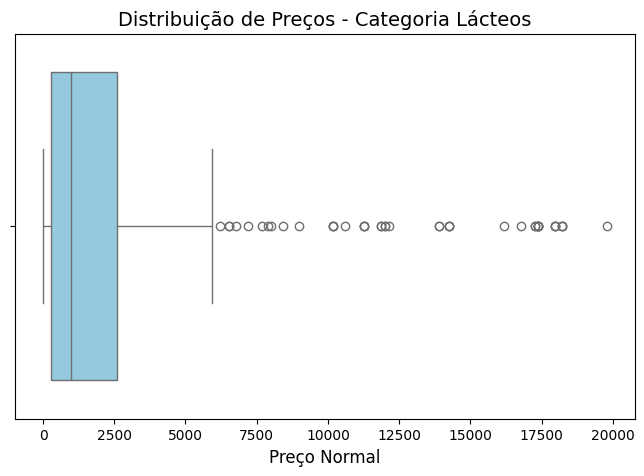

In [12]:
plt.figure(figsize=(8, 5))
sns.boxplot(x=df_lacteos['preco_normal'], color='skyblue')
plt.title("Distribuição de Preços - Categoria Lácteos", fontsize=14)
plt.xlabel("Preço Normal", fontsize=12)
plt.show()

Observa-se muitos outliers puxando a média para cima

# 4 - Plote um gráfico de barras onde temos a média de descontos por categoria.

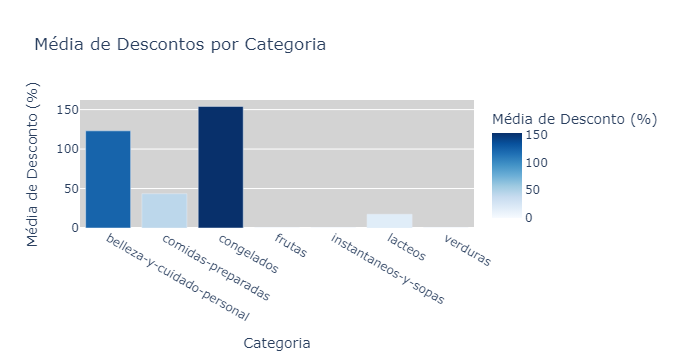

In [18]:
df_descontos = df.groupby("categoria", as_index=False)["Desconto"].mean()

fig = px.bar(df_descontos, x="categoria", y="Desconto", 
             title="Média de Descontos por Categoria", 
             labels={"Desconto": "Média de Desconto (%)", "categoria": "Categoria"},
             color="Desconto",
             color_continuous_scale="Blues")

fig.update_layout(plot_bgcolor="lightgray") #mudando a cor do fundo para melhor visualização 
fig.show()

# 5 - Plote um gráfico de mapa interativo agrupando os dados por categoria, marca e trazendo a média de desconto.

                      categoria                      Marca    Desconto
0    belleza-y-cuidado-personal                     Always  123.750000
1    belleza-y-cuidado-personal                  Aquafresh  444.666667
2    belleza-y-cuidado-personal                        Axe  590.000000
3    belleza-y-cuidado-personal                   Babyland    0.000000
4    belleza-y-cuidado-personal                  Ballerina   34.083333
..                          ...                        ...         ...
162                     lacteos                  Zerolacto    0.000000
163                    verduras                   Agrosano    0.000000
164                    verduras                       Dole    0.000000
165                    verduras  Frutas Y Verduras Propias    0.000000
166                    verduras                      Jumbo    0.000000

[167 rows x 3 columns]


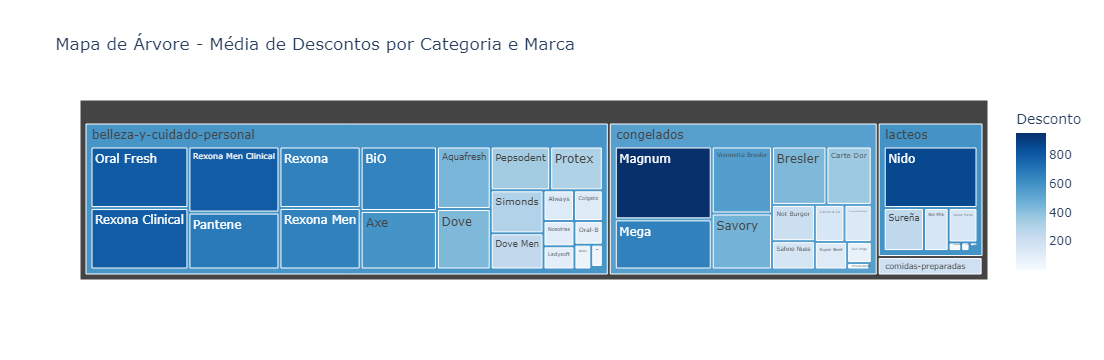

In [43]:
# Verificando os valores de desconto após o agrupamento
df_grouped = df.groupby(["categoria", "Marca"], as_index=False)["Desconto"].mean()

# Mostrar as médias de desconto por categoria e marca
print(df_grouped[['categoria', 'Marca', 'Desconto']])

# Substituindo valores zero por um valor que não altere a leitura de maneira brusca
df_grouped['Desconto'] = df_grouped['Desconto'].replace(0, 0.1)

#Mapa de arvore
fig = px.treemap(df_grouped, 
                 path=["categoria", "Marca"], 
                 values="Desconto", 
                 color="Desconto", 
                 color_continuous_scale="Blues", 
                 title="Média de Descontos por Categoria e Marca")

fig.show()
